### Data Mining with Weka Week 2

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


from pycaret.classification import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(123)

In [2]:
segment = pd.read_csv("segmentchallenge.csv")

In [3]:
segment

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,38,189,9,0.000000,0.000000,1.000000,0.222222,6.222220,33.318500,29.074100,26.333300,35.22220,25.66670,-8.22222,18.44440,-10.22220,35.22220,0.271208,-2.04915,path
1,25,199,9,0.000000,0.000000,1.111110,0.607407,1.055560,0.462963,17.518500,13.111100,17.88890,21.55560,-13.22220,1.11111,12.11110,21.55560,0.393002,2.69011,grass
2,49,139,9,0.000000,0.000000,0.166667,0.077778,0.333333,0.088889,0.444444,0.000000,1.33333,0.00000,-1.33333,2.66667,-1.33333,1.33333,0.777778,-2.09440,foliage
3,63,220,9,0.000000,0.000000,3.055560,15.263000,3.666670,6.088890,8.185190,6.555560,6.44444,11.55560,-4.88889,-5.22222,10.11110,11.55560,0.486717,2.09315,grass
4,161,135,9,0.000000,0.000000,0.055556,0.136083,0.111111,0.172133,1.259260,0.777778,3.00000,0.00000,-1.44444,5.22222,-3.77778,3.00000,1.000000,-1.82221,window
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,113,123,9,0.111111,0.000000,1.444440,0.620633,1.944440,1.718100,59.333300,51.888900,73.77780,52.33330,-22.33330,43.33330,-21.00000,73.77780,0.299164,-2.11194,cement
1496,245,93,9,0.111111,0.000000,2.888890,3.896310,1.944440,4.907410,86.296300,70.666700,112.11100,76.11110,-46.88890,77.44440,-30.55560,112.11100,0.369638,-2.23156,sky
1497,207,215,9,0.000000,0.000000,3.222220,2.040330,2.500000,1.615890,23.814800,18.111100,22.66670,30.66670,-17.11110,-3.44444,20.55560,30.66670,0.409837,2.47176,grass
1498,242,65,9,0.000000,0.000000,0.555555,0.272166,1.000000,0.421637,8.925930,6.111110,14.33330,6.33333,-8.44444,16.22220,-7.77778,14.33330,0.583461,-2.12188,window


In [4]:
segment['class'].value_counts()

path         236
sky          220
cement       220
foliage      208
grass        207
brickface    205
window       204
Name: class, dtype: int64

In [5]:
exp_clf101 = setup(data = segment, target = 'class', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"brickface: 0, cement: 1, foliage: 2, grass: 3, path: 4, sky: 5, window: 6"
3,Original Data,"(1500, 20)"
4,Missing Values,False
5,Numeric Features,18
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9429,0.0,0.9428,0.9592,0.9444,0.9333
1,0.9333,0.0,0.9332,0.9406,0.9352,0.9222
2,0.9524,0.0,0.9535,0.9614,0.9531,0.9444
3,0.9619,0.0,0.9618,0.9648,0.9625,0.9555
4,0.9238,0.0,0.9190,0.9400,0.9254,0.9110
5,0.9333,0.0,0.9293,0.9556,0.9320,0.9222
6,0.9619,0.0,0.9612,0.9704,0.9633,0.9555
7,0.9333,0.0,0.9306,0.9452,0.9333,0.9222
8,0.9048,0.0,0.9038,0.9359,0.9104,0.8889
9,0.9038,0.0,0.9041,0.9356,0.9058,0.8878


In [7]:
dia = pd.read_csv("diabetes.csv")

In [8]:
dia

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [9]:
exp_clf2 = setup(data = dia, target = 'class', session_id=123, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"tested_negative: 0, tested_positive: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
dt2 = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7742,0.7330,0.5909,0.7222,0.6500,0.4858
1,0.7419,0.6875,0.5000,0.6875,0.5789,0.3995
2,0.7581,0.7409,0.6818,0.6522,0.6667,0.4769
3,0.7097,0.6932,0.6364,0.5833,0.6087,0.3786
4,0.6885,0.6494,0.5238,0.5500,0.5366,0.3022
5,0.7705,0.7571,0.7143,0.6522,0.6818,0.5029
6,0.7049,0.6732,0.5714,0.5714,0.5714,0.3464
7,0.6230,0.5768,0.4286,0.4500,0.4390,0.1553
8,0.7541,0.7220,0.6190,0.6500,0.6341,0.4491
9,0.7049,0.6958,0.6667,0.5600,0.6087,0.3747


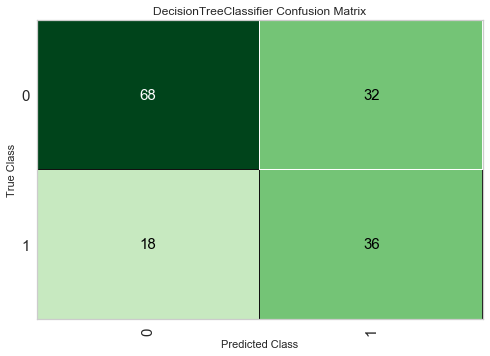

In [12]:
plot_model(dt2, plot="confusion_matrix")

In [13]:
evaluate_model(dt2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
iris = pd.read_csv("iris.csv")

In [18]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
glass = pd.read_csv("glass.csv")

In [22]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,buildwindfloat
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,vehicwindfloat
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,buildwindfloat
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,buildwindnonfloat
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,vehicwindfloat
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,buildwindnonfloat
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,buildwindnonfloat
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,buildwindnonfloat


In [23]:
exp_clf3 = setup(data = glass, target = 'Type', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"buildwindfloat: 0, buildwindnonfloat: 1, containers: 2, headlamps: 3, tableware: 4, vehicwindfloat: 5"
3,Original Data,"(214, 10)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [24]:
dt3 = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7333,0.0,0.8467,0.8833,0.7505,0.6471
1,0.4667,0.0,0.2833,0.5500,0.4929,0.2899
2,0.6667,0.0,0.5667,0.6556,0.6448,0.5536
3,0.6000,0.0,0.5333,0.6889,0.5885,0.4828
4,0.6000,0.0,0.8000,0.7467,0.6119,0.5213
5,0.7333,0.0,0.8667,0.7778,0.7333,0.6591
6,0.5333,0.0,0.7167,0.7778,0.5799,0.4324
7,0.6667,0.0,0.6167,0.7444,0.6978,0.5690
8,0.5333,0.0,0.5250,0.6233,0.5737,0.3558
9,0.5714,0.0,0.4167,0.5442,0.5392,0.3913


In [25]:
nb3 = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5333,0.0,0.4267,0.5481,0.5016,0.3312
1,0.4667,0.0,0.2833,0.4905,0.4593,0.2727
2,0.5333,0.0,0.5000,0.4794,0.4686,0.3860
3,0.3333,0.0,0.4000,0.6556,0.3797,0.2308
4,0.5333,0.0,0.5000,0.4778,0.4885,0.3598
5,0.6000,0.0,0.5333,0.5333,0.5175,0.4375
6,0.5333,0.0,0.4500,0.5000,0.4508,0.3478
7,0.4000,0.0,0.3000,0.2556,0.3118,0.2012
8,0.5333,0.0,0.4267,0.5222,0.4896,0.3478
9,0.4286,0.0,0.4333,0.5667,0.3214,0.2381
